In [1]:
##Getting API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
import pandas as pd

#allows to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9767,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.917176e+07,1.917176e+07,NaN,1,NaN,NaN,None,2022-10-07T07:43:00.000Z,19927.566194,2.962547e+10,-18.5102,0.255819,-1.382240,1.725572,6.145553,-16.213238,-7.842641,3.820464e+11,39.9847,4.184789e+11,None,2022-10-07T07:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-07 07:45:05.491124
1,1027,Ethereum,ETH,ethereum,6128,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.226878e+08,1.226878e+08,NaN,2,NaN,NaN,None,2022-10-07T07:43:00.000Z,1354.740669,1.049620e+10,-8.3824,0.299623,-0.797086,0.812083,-10.688267,-21.855164,10.884653,1.662101e+11,17.3954,1.662101e+11,None,2022-10-07T07:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-07 07:45:05.491124
2,825,Tether,USDT,tether,40543,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.821257e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-10-07T07:43:00.000Z,1.000157,3.830324e+10,-15.8103,-0.000792,0.002224,0.005591,0.007709,-0.000974,0.070072,6.822327e+10,7.1402,7.016645e+10,None,2022-10-07T07:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-07 07:45:05.491124
3,3408,USD Coin,USDC,usd-coin,6450,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.614913e+10,4.614913e+10,NaN,4,NaN,NaN,None,2022-10-07T07:43:00.000Z,1.000034,3.762479e+09,-3.5780,0.007213,0.016584,-0.000833,-0.006240,0.001462,-0.020218,4.615072e+10,4.8301,4.615072e+10,None,2022-10-07T07:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-07 07:45:05.491124
4,1839,BNB,BNB,bnb,1121,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-10-07T07:43:00.000Z,285.277530,1.075453e+09,54.5972,0.479499,-3.206671,-0.029998,8.061877,-13.319824,16.868828,4.602590e+10,4.8170,5.705551e+10,None,2022-10-07T07:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-07 07:45:05.491124
5,52,XRP,XRP,xrp,826,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.985858e+10,9.998928e+10,NaN,6,NaN,NaN,None,2022-10-07T07:43:00.000Z,0.489554,1.734954e+09,-27.0478,0.609330,-1.014329,-0.648957,53.147009,29.763912,42.280897,2.440846e+10,2.5542,4.895539e+10,None,2022-10-07T07:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-07 07:45:05.491124
6,4687,Binance USD,BUSD,binance-usd,5239,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.104223e+10,2.104223e+10,NaN,7,NaN,NaN,None,2022-10-07T07:43:00.000Z,1.000517,5.720437e+09,-16.7495,0.036435,0.077016,0.087505,0.022333,0.054640,-0.024224,2.105311e+10,2.2036,2.105311e+10,None,2022-10-07T07:43:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-07 07:45:05.491124
7,2010,Cardano,ADA,cardano,577,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.426619e+10,3.498843e+10,NaN,8,NaN,NaN,None,2022-10-07T07:43:00.000Z,0.427261,3.788303e+08,-19.3372,0.127923,-1.251711,-2.359586,-7.719161,-20.844825,-11.051648,1.464060e+10,1.5324,1.922673e+10,None,2022-10-07T07:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-07 07:45:05.491124
8,5426,Solana,SOL,solana,389,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.557253e+08,5.116169e+08,NaN,9,NaN,NaN,N

In [4]:
#Creating a function to call
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


In [5]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/jq/qrb90qps0yb1czmg7cyqn5z40000gn/T/ipykernel_6967/897018332.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/jq/qrb90qps0yb1czmg7cyqn5z40000gn/T/ipykernel_6967/897018332.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/jq/qrb90qps0yb1czmg7cyqn5z40000gn/T/ipykernel_6967/897018332.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [6]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.270869,-1.385318,1.717706,6.137017,-16.208999,-7.834639
Ethereum,0.310064,-0.802596,0.821708,-10.691347,-21.841963,10.885832
Tether,-0.000813,0.002194,0.005162,0.007554,-0.000730,0.069475
USD Coin,0.007199,0.013018,-0.002607,-0.006575,0.000906,-0.019755
BNB,0.510290,-3.207858,-0.023318,8.045686,-13.309696,16.870458
XRP,0.626449,-1.018161,-0.679433,53.143232,29.759308,42.278932
Binance USD,0.008302,0.053147,0.038438,-0.013595,0.024414,-0.059267
Cardano,0.137814,-1.239109,-2.338294,-7.712351,-20.835327,-11.038994
Solana,0.052370,-1.936290,-2.866497,7.444384,-21.885490,-13.508921


In [7]:
#Minor adjustmennts/cleaning before visualization
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.270869
             quote.USD.percent_change_24h    -1.385318
             quote.USD.percent_change_7d      1.717706
             quote.USD.percent_change_30d     6.137017
             quote.USD.percent_change_60d   -16.208999
             quote.USD.percent_change_90d    -7.834639
Ethereum     quote.USD.percent_change_1h      0.310064
             quote.USD.percent_change_24h    -0.802596
             quote.USD.percent_change_7d      0.821708
             quote.USD.percent_change_30d   -10.691347
             quote.USD.percent_change_60d   -21.841963
             quote.USD.percent_change_90d    10.885832
Tether       quote.USD.percent_change_1h     -0.000813
             quote.USD.percent_change_24h     0.002194
             quote.USD.percent_change_7d      0.005162
             quote.USD.percent_change_30d     0.007554
             quote.USD.percent_change_60d    -0.000730
             quote.USD.

In [8]:
type(df4)

pandas.core.series.Series

In [25]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h    0.270869
            quote.USD.percent_change_24h  -1.385318
            quote.USD.percent_change_7d    1.717706
            quote.USD.percent_change_30d   6.137017
            quote.USD.percent_change_60d -16.208999
            quote.USD.percent_change_90d  -7.834639
Ethereum    quote.USD.percent_change_1h    0.310064
            quote.USD.percent_change_24h  -0.802596
            quote.USD.percent_change_7d    0.821708
            quote.USD.percent_change_30d -10.691347
            quote.USD.percent_change_60d -21.841963
            quote.USD.percent_change_90d  10.885832
Tether      quote.USD.percent_change_1h   -0.000813
            quote.USD.percent_change_24h   0.002194
            quote.USD.percent_change_7d    0.005162
            quote.USD.percent_change_30d   0.007554
            quote.USD.percent_change_60d  -0.000730
            quote.USD.percent_change_90d   0.069475
USD Coin    quote.USD.percent_change_1h    0.007199
            quote.USD.percent_change_24h   0.013018
            quote.USD.percent_change_7d   -0.002607
            quote.USD.percent_change_30d  -0.006575
            quote.USD.percent_change_60d   0.000906
            quote.USD.percent_change_90d  -0.019755
BNB         quote.USD.percent_change_1h    0.510290
            quote.USD.percent_change_24h  -3.207858
            quote.USD.percent_change_7d   -0.023318
            quote.USD.percent_change_30d   8.045686
            quote.USD.percent_change_60d -13.309696
            quote.USD.percent_change_90d  16.870458
XRP         quote.USD.percent_change_1h    0.626449
            quote.USD.percent_change_24h  -1.018161
            quote.USD.percent_change_7d   -0.679433
            quote.USD.percent_change_30d  53.143232
            quote.USD.percent_change_60d  29.759308
            quote.USD.percent_change_90d  42.278932
Binance USD quote.USD.percent_change_1h    0.008302
            quote.USD.percent_change_24h   0.053147
            quote.USD.percent_change_7d    0.038438
            quote.USD.percent_change_30d  -0.013595
            quote.USD.percent_change_60d   0.024414
            quote.USD.percent_change_90d  -0.059267
Cardano     quote.USD.percent_change_1h    0.137814
            quote.USD.percent_change_24h  -1.239109
            quote.USD.percent_change_7d   -2.338294
            quote.USD.percent_change_30d  -7.712351
            quote.USD.percent_change_60d -20.835327
            quote.USD.percent_change_90d -11.038994
Solana      quote.USD.percent_change_1h    0.052370
            quote.USD.percent_change_24h  -1.936290
            quote.USD.percent_change_7d   -2.866497
            quote.USD.percent_change_30d   7.444384
            quote.USD.percent_change_60d -21.885490
            quote.USD.percent_change_90d -13.508921
Dogecoin    quote.USD.percent_change_1h    0.115470
            quote.USD.percent_change_24h  -3.267558
            quote.USD.percent_change_7d    3.651333
            quote.USD.percent_change_30d   7.153970
            quote.USD.percent_change_60d -10.387302
            quote.USD.percent_change_90d  -9.320902
Polygon     quote.USD.percent_change_1h    0.186208
            quote.USD.percent_change_24h  -0.621965
            quote.USD.percent_change_7d    8.133953
            quote.USD.percent_change_30d   3.828009
            quote.USD.percent_change_60d  -9.751633
            quote.USD.percent_change_90d  40.285177
Polkadot    quote.USD.percent_change_1h    0.267872
            quote.USD.percent_change_24h  -1.230551
            quote.USD.percent_change_7d   -1.908882
            quote.USD.percent_change_30d  -8.395070
            quote.USD.percent_change_60d -28.943509
            quote.USD.percent_change_90d -12.193178
Dai         quote.USD.percent_change_1h    0.032574
            quote.USD.percent_change_24h   0.006363
            quote.USD.percent_change_7d   -0.029770
            quote.USD.percent_change_30d 

In [10]:
df5.count()

values    90
dtype: int64

In [26]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.270869
1,Bitcoin,quote.USD.percent_change_24h,-1.385318
2,Bitcoin,quote.USD.percent_change_7d,1.717706
3,Bitcoin,quote.USD.percent_change_30d,6.137017
4,Bitcoin,quote.USD.percent_change_60d,-16.208999
5,Bitcoin,quote.USD.percent_change_90d,-7.834639
6,Ethereum,quote.USD.percent_change_1h,0.310064
7,Ethereum,quote.USD.percent_change_24h,-0.802596
8,Ethereum,quote.USD.percent_change_7d,0.821708
9,Ethereum,quote.USD.percent_change_30d,-10.691347


In [27]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.270869
1,Bitcoin,quote.USD.percent_change_24h,-1.385318
2,Bitcoin,quote.USD.percent_change_7d,1.717706
3,Bitcoin,quote.USD.percent_change_30d,6.137017
4,Bitcoin,quote.USD.percent_change_60d,-16.208999
5,Bitcoin,quote.USD.percent_change_90d,-7.834639
6,Ethereum,quote.USD.percent_change_1h,0.310064
7,Ethereum,quote.USD.percent_change_24h,-0.802596
8,Ethereum,quote.USD.percent_change_7d,0.821708
9,Ethereum,quote.USD.percent_change_30d,-10.691347


In [28]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.270869
1,Bitcoin,24h,-1.385318
2,Bitcoin,7d,1.717706
3,Bitcoin,30d,6.137017
4,Bitcoin,60d,-16.208999
5,Bitcoin,90d,-7.834639
6,Ethereum,quote.USD.percent_change_1h,0.310064
7,Ethereum,24h,-0.802596
8,Ethereum,7d,0.821708
9,Ethereum,30d,-10.691347


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

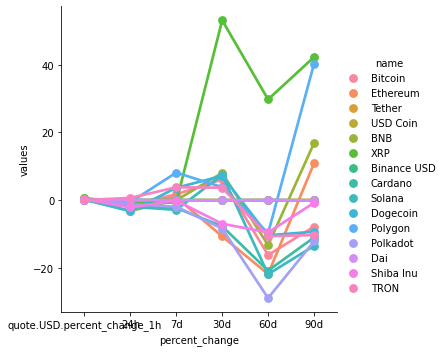

In [30]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()